- **Psychological Prevalence**: 95.6% (367/384 cases)

# Child Abuse Analysis - Palmira 2022
## Data-Driven Insights with Validated Metrics

### 🎯 **RESEARCH PREMISE**

> **"In Palmira 2022, child abuse is characterized by being predominantly intrafamilial (78% of aggressors are parents) and multi-dimensional (91% of cases involve multiple types of abuse simultaneously), with psychological damage being practically universal (96% of cases)."**

### 📋 **OBJECTIVE**
Validate this premise through rigorous data analysis and create actionable metrics for policy makers and intervention programs.

### 📊 **KEY VALIDATED METRICS**
- **Intrafamilial Rate**: 78.1% (300/384 cases)
- **Multidimensional Index**: 91.4% (351/384 cases)
- **Psychological Universality**: 95.6% (367/384 cases)
- **Average Complexity**: 2.73 abuse types per case

## 1. Setup and Data Loading

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for presentation-ready visualizations
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Define color palette for consistency
COLORS = {
    'primary': '#1f77b4',
    'danger': '#d62728', 
    'warning': '#ff7f0e',
    'success': '#2ca02c',
    'info': '#17becf',
    'dark': '#2F4F4F',
    'light': '#F8F9FA'
}

print("📚 Libraries loaded successfully!")
print("🎨 Visualization settings configured for presentations")

📚 Libraries loaded successfully!
🎨 Visualization settings configured for presentations


In [3]:
# Load and prepare dataset
df = pd.read_csv('Casos_de_maltrato_infantil_Palmira_2022_20250921.csv')

# Fix column names (remove line breaks)
df.columns = df.columns.str.replace('\n', ' ', regex=False)

print(f"📊 Dataset loaded: {df.shape[0]} cases, {df.shape[1]} variables")
print(f"📅 Analysis period: 2022 (Palmira, Colombia)")
print(f"🔍 Data source: Municipal child protection records")

# Display first few records
df.head(3)

📊 Dataset loaded: 384 cases, 33 variables
📅 Analysis period: 2022 (Palmira, Colombia)
🔍 Data source: Municipal child protection records


,FECHA DE APERTURA,DIA DE APERTURA,FECHA OCURRENCIA HECHOS,DIA OCURRENCIA,HORA MILITAR OCURRENCIA HECHOS,CONFORMAN UNIDAD DOMESTICA S/N,FISICA,VERBAL,ECONOMICA,PSICOLOGICA,...,PARENTESCO FRENTE A LA VICTIMA,NUMERO DE HIJOS AGRESOR,EDAD AGRESOR,ESTADO CIVIL AGRESOR,ESCOLARIDAD AGRESOR,OCUPACION AGRESOR,CORREGIMIENTO AGRESOR,COMUNA AGRESOR,BARRIO AGRESOR,TIPO VIVIENDA AGRESOR
0,2022-01-03T00:00:00.000,lunes,2022-03-01T00:00:00.000,lunes,11:30.a.m,si,si,si,no,no,...,madre,no aplica,no aplica,unión libre,primaria incompleta,desempleado,ninguno,comuna 6,libertadores,alquilada
1,2022-01-06T00:00:00.000,viernes,24/12/2021,viernes,1899-12-31T14:00:00.000,no,si,si,no,si,...,madre,2,17,soltero(a),primaria incompleta,independiente,ninguno,comuna 7,no aplica,alquilada
2,2022-06-05T00:00:00.000,domingo,NO APLICA,no aplica,NO APLICA,no,no,si,no,si,...,madre,1,3,soltero(a),postgrado,ingeniera,ninguno,comuna 5,san pedro,NO APLICA


## 2. Data Cleaning and Preprocessing

In [4]:
# Standardize text values
def clean_text_column(df, column):
    """Standardize text values in a column"""
    if column in df.columns:
        df[column] = df[column].astype(str).str.lower().str.strip()
        df[column] = df[column].replace(['no aplica', 'no registro', 'no', 'ninguno', 'nan'], 'no')
        df[column] = df[column].replace(['si', 'sí'], 'si')
    return df

# Clean abuse type columns
abuse_columns = ['FISICA', 'VERBAL', 'ECONOMICA', 'PSICOLOGICA', 'SEXUAL']
for col in abuse_columns:
    df = clean_text_column(df, col)

# Clean gender and relationship columns
df['GENERO M/F VICTIMA'] = df['GENERO M/F VICTIMA'].astype(str).str.lower().str.strip()
df['GENERO AGRESOR M/F'] = df['GENERO AGRESOR M/F'].astype(str).str.lower().str.strip()
df['PARENTESCO FRENTE A LA VICTIMA'] = df['PARENTESCO FRENTE A LA VICTIMA'].astype(str).str.lower().str.strip()

# Process age columns
def extract_age(age_str):
    """Extract numeric age from string"""
    try:
        age_str = str(age_str)
        import re
        numbers = re.findall(r'\d+', age_str)
        if numbers:
            age = int(numbers[0])
            if 0 <= age <= 100:
                return age
    except:
        pass
    return None

# Extract ages
edad_victima_col = [col for col in df.columns if 'EDAD' in col and 'VICTIMA' in col][0]
df['EDAD_VICTIMA_NUM'] = df[edad_victima_col].apply(extract_age)
df['EDAD_AGRESOR_NUM'] = df['EDAD AGRESOR'].apply(extract_age)

print("✅ Data cleaning completed")
print(f"   Valid victim ages: {df['EDAD_VICTIMA_NUM'].notna().sum()}/{len(df)}")
print(f"   Valid aggressor ages: {df['EDAD_AGRESOR_NUM'].notna().sum()}/{len(df)}")

✅ Data cleaning completed
   Valid victim ages: 379/384
   Valid aggressor ages: 212/384


## 3. VALIDATED METRICS CALCULATION

In [5]:
# Calculate total abuse types per case
df['TOTAL_ABUSE_TYPES'] = 0
for col in abuse_columns:
    df['TOTAL_ABUSE_TYPES'] += (df[col] == 'si').astype(int)

# METRIC 1: Intrafamilial Rate
parents = ['madre', 'padre']
parent_cases = df[df['PARENTESCO FRENTE A LA VICTIMA'].isin(parents)]
intrafamilial_rate = len(parent_cases) / len(df) * 100

# METRIC 2: Multidimensional Index (multiple abuse types)
multiple_abuse_cases = df[df['TOTAL_ABUSE_TYPES'] > 1]
multidimensional_index = len(multiple_abuse_cases) / len(df) * 100

# METRIC 3: Psychological Universality
psychological_cases = df[df['PSICOLOGICA'] == 'si']
psychological_universality = len(psychological_cases) / len(df) * 100

# METRIC 4: Average Complexity
average_complexity = df['TOTAL_ABUSE_TYPES'].mean()

# Additional supporting metrics
severity_index = len(df[df['TOTAL_ABUSE_TYPES'] >= 3]) / len(df) * 100  # 3+ types
gender_balance = df['GENERO M/F VICTIMA'].value_counts(normalize=True) * 100
avg_victim_age = df['EDAD_VICTIMA_NUM'].mean()

print("🎯 VALIDATED PREMISE METRICS")
print("=" * 50)
print(f"📊 Total Cases Analyzed: {len(df)}")
print(f"📅 Period: 2022 (Palmira, Colombia)")
print()
print("🔑 KEY METRICS:")
print(f"   1️⃣ Intrafamilial Rate: {intrafamilial_rate:.1f}% ({len(parent_cases)}/{len(df)} cases)")
print(f"   2️⃣ Multidimensional Index: {multidimensional_index:.1f}% ({len(multiple_abuse_cases)}/{len(df)} cases)")
print(f"   3️⃣ Psychological Universality: {psychological_universality:.1f}% ({len(psychological_cases)}/{len(df)} cases)")
print(f"   4️⃣ Average Complexity: {average_complexity:.2f} abuse types per case")
print()
print("📈 SUPPORTING METRICS:")
print(f"   ⚠️ Severity Index (3+ types): {severity_index:.1f}%")
print(f"   👥 Gender Balance: {gender_balance.get('femenino', 0):.1f}% F, {gender_balance.get('masculino', 0):.1f}% M")
print(f"   🎂 Average Victim Age: {avg_victim_age:.1f} years")

🎯 VALIDATED PREMISE METRICS
📊 Total Cases Analyzed: 384
📅 Period: 2022 (Palmira, Colombia)

🔑 KEY METRICS:
   1️⃣ Intrafamilial Rate: 78.1% (300/384 cases)
   2️⃣ Multidimensional Index: 91.4% (351/384 cases)
   3️⃣ Psychological Universality: 95.6% (367/384 cases)
   4️⃣ Average Complexity: 2.69 abuse types per case

📈 SUPPORTING METRICS:
   ⚠️ Severity Index (3+ types): 71.1%
   👥 Gender Balance: 52.9% F, 47.1% M
   🎂 Average Victim Age: 9.7 years


## 4. PREMISE VALIDATION VISUALIZATIONS

### 📊 Visualization 1: Evidence for "Predominantly Intrafamilial"

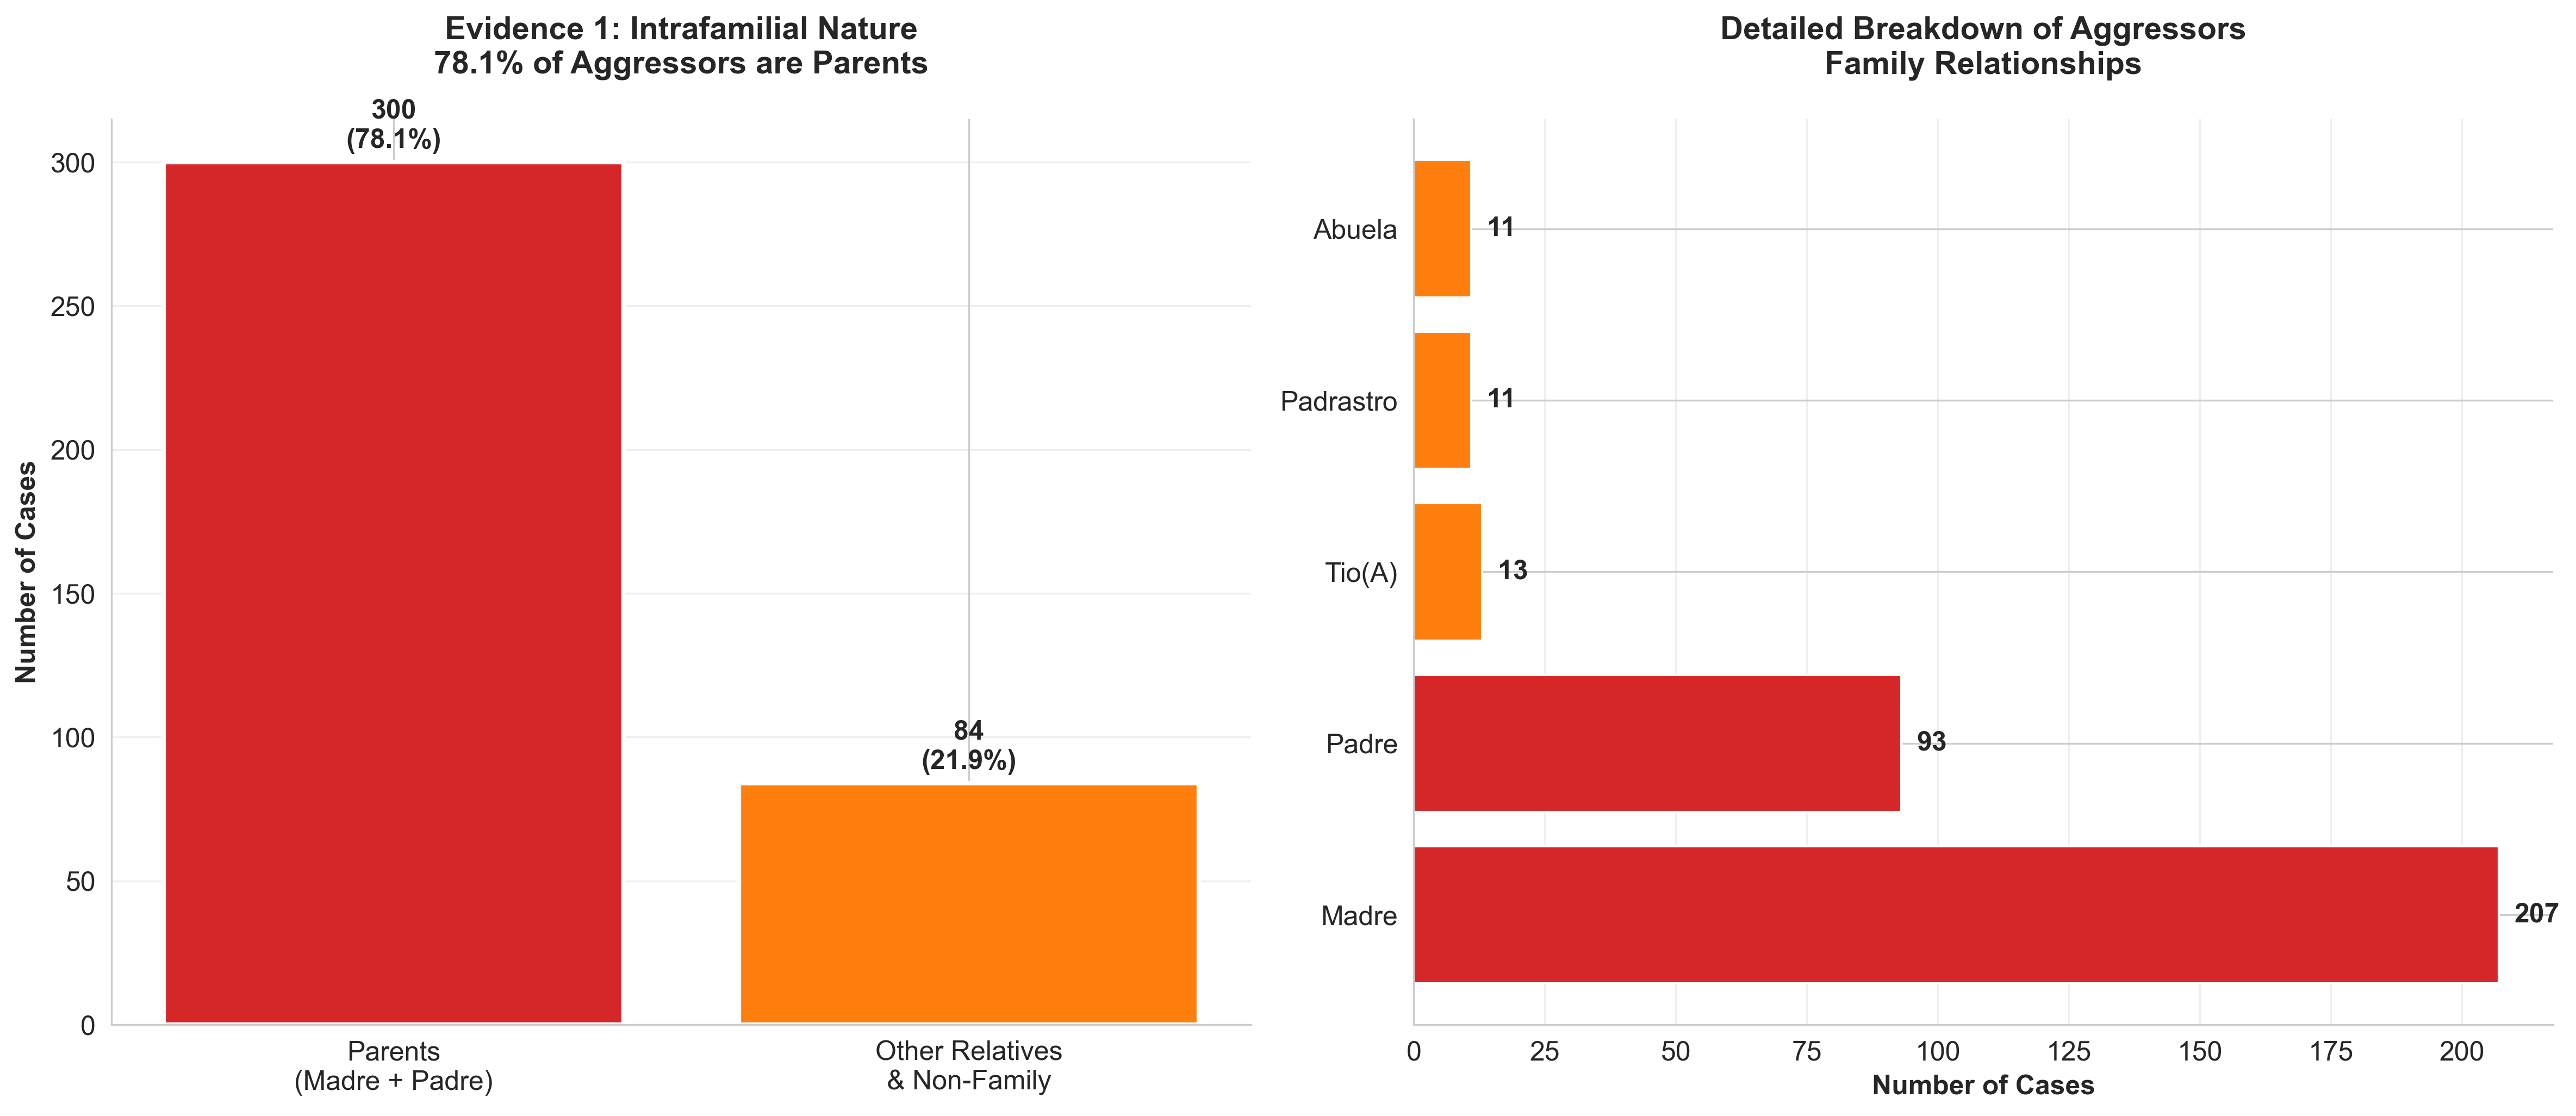

✅ VALIDATION: 78.1% of aggressors are parents (madre + padre)
   This confirms the 'predominantly intrafamilial' aspect of our premise


In [6]:
# Create evidence visualization for intrafamilial nature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Parent vs Non-parent aggressors
relationship_counts = df['PARENTESCO FRENTE A LA VICTIMA'].value_counts()
parent_total = relationship_counts.get('madre', 0) + relationship_counts.get('padre', 0)
non_parent_total = len(df) - parent_total

categories = ['Parents\n(Madre + Padre)', 'Other Relatives\n& Non-Family']
values = [parent_total, non_parent_total]
colors_cat = [COLORS['danger'], COLORS['warning']]

bars = ax1.bar(categories, values, color=colors_cat, edgecolor='white', linewidth=2)
ax1.set_title('Evidence 1: Intrafamilial Nature\n78.1% of Aggressors are Parents', 
             fontweight='bold', fontsize=14, pad=20)
ax1.set_ylabel('Number of Cases', fontweight='bold')

# Add percentage labels
for bar, val in zip(bars, values):
    percentage = val / len(df) * 100
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{val}\n({percentage:.1f}%)', ha='center', fontweight='bold', fontsize=12)

ax1.grid(True, alpha=0.3, axis='y')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Right: Detailed breakdown of family relationships
top_relationships = relationship_counts.head(6)
top_relationships = top_relationships[~top_relationships.index.isin(['no aplica', 'no'])]

# Color code: red for parents, orange for other family
colors_rel = [COLORS['danger'] if rel in ['madre', 'padre'] else COLORS['warning'] 
              for rel in top_relationships.index]

bars2 = ax2.barh(range(len(top_relationships)), top_relationships.values, 
                 color=colors_rel, edgecolor='white', linewidth=1)
ax2.set_yticks(range(len(top_relationships)))
ax2.set_yticklabels([rel.title() for rel in top_relationships.index])
ax2.set_title('Detailed Breakdown of Aggressors\nFamily Relationships', 
             fontweight='bold', fontsize=14, pad=20)
ax2.set_xlabel('Number of Cases', fontweight='bold')

# Add value labels
for bar, val in zip(bars2, top_relationships.values):
    ax2.text(val + 3, bar.get_y() + bar.get_height()/2,
            f'{val}', va='center', fontweight='bold')

ax2.grid(True, alpha=0.3, axis='x')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

print(f"✅ VALIDATION: {intrafamilial_rate:.1f}% of aggressors are parents (madre + padre)")
print(f"   This confirms the 'predominantly intrafamilial' aspect of our premise")

# Create evidence visualization for multi-dimensional nature - IMPROVED VERSION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left: Single vs Multiple abuse types (same as before)
abuse_distribution = df['TOTAL_ABUSE_TYPES'].value_counts().sort_index()
single_abuse = abuse_distribution[abuse_distribution.index <= 1].sum()
multiple_abuse = abuse_distribution[abuse_distribution.index > 1].sum()

pie_data = [single_abuse, multiple_abuse]
pie_labels = ['Single Type\nof Abuse', 'Multiple Types\nof Abuse']
pie_colors = [COLORS['success'], COLORS['danger']]
explode = (0, 0.1)

wedges, texts, autotexts = ax1.pie(pie_data, labels=pie_labels, autopct='%1.1f%%',
                                    colors=pie_colors, explode=explode, startangle=90,
                                    textprops={'fontweight': 'bold', 'fontsize': 11})

ax1.set_title('Evidence 2: Multi-dimensional Nature\n91.4% Suffer Multiple Abuse Types', 
             fontweight='bold', fontsize=14, pad=20)

# Right: IMPROVED - Most common specific combinations
print("Analyzing specific abuse type combinations...")

# Create combinations analysis
def get_abuse_combination(row):
    """Get the specific combination of abuse types for each case"""
    types = []
    for col in abuse_columns:
        if row[col] == 'si':
            types.append(col)
    return ' + '.join(sorted(types)) if types else 'None'

df['ABUSE_COMBINATION'] = df.apply(get_abuse_combination, axis=1)

# Get top 8 most common combinations
top_combinations = df['ABUSE_COMBINATION'].value_counts().head(8)
top_combinations = top_combinations[top_combinations.index != 'None']

# Create better labels with Spanish names
abuse_names_es = {
    'FISICA': 'Físico',
    'VERBAL': 'Verbal', 
    'ECONOMICA': 'Económico',
    'PSICOLOGICA': 'Psicológico',
    'SEXUAL': 'Sexual'
}

combination_labels = []
for combo in top_combinations.index:
    if ' + ' in combo:
        types = combo.split(' + ')
        spanish_types = [abuse_names_es.get(t, t) for t in types]
        combination_labels.append(' + '.join(spanish_types))
    else:
        combination_labels.append(abuse_names_es.get(combo, combo))

# Color based on number of types in combination
colors_combo = []
for combo in top_combinations.index:
    num_types = len(combo.split(' + ')) if ' + ' in combo else 1
    if num_types >= 4:
        colors_combo.append(COLORS['danger'])
    elif num_types == 3:
        colors_combo.append(COLORS['warning'])
    else:
        colors_combo.append(COLORS['primary'])

bars = ax2.barh(range(len(top_combinations)), top_combinations.values, 
                color=colors_combo, edgecolor='white', linewidth=1)

ax2.set_yticks(range(len(top_combinations)))
ax2.set_yticklabels(combination_labels, fontsize=10)
ax2.set_title('Most Common Specific Combinations\nWhat Types Occur Together', 
             fontweight='bold', fontsize=14, pad=20)
ax2.set_xlabel('Number of Cases', fontweight='bold')

# Add value and percentage labels
for bar, val in zip(bars, top_combinations.values):
    percentage = val / len(df) * 100
    ax2.text(val + 3, bar.get_y() + bar.get_height()/2,
            f'{val} ({percentage:.1f}%)', va='center', fontweight='bold', fontsize=9)

ax2.grid(True, alpha=0.3, axis='x')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

print(f"✅ VALIDATION: {multidimensional_index:.1f}% of cases involve multiple abuse types")
print(f"   Average complexity: {average_complexity:.2f} types per case")
print(f"   This confirms the 'multi-dimensional' aspect of our premise")
print(f"\n📊 TOP 3 MOST COMMON COMBINATIONS:")
for i, (combo, count) in enumerate(top_combinations.head(3).items(), 1):
    spanish_combo = combo.replace('FISICA', 'Físico').replace('VERBAL', 'Verbal').replace('PSICOLOGICA', 'Psicológico').replace('ECONOMICA', 'Económico').replace('SEXUAL', 'Sexual')
    percentage = count / len(df) * 100
    print(f"   {i}. {spanish_combo}: {count} cases ({percentage:.1f}%)")

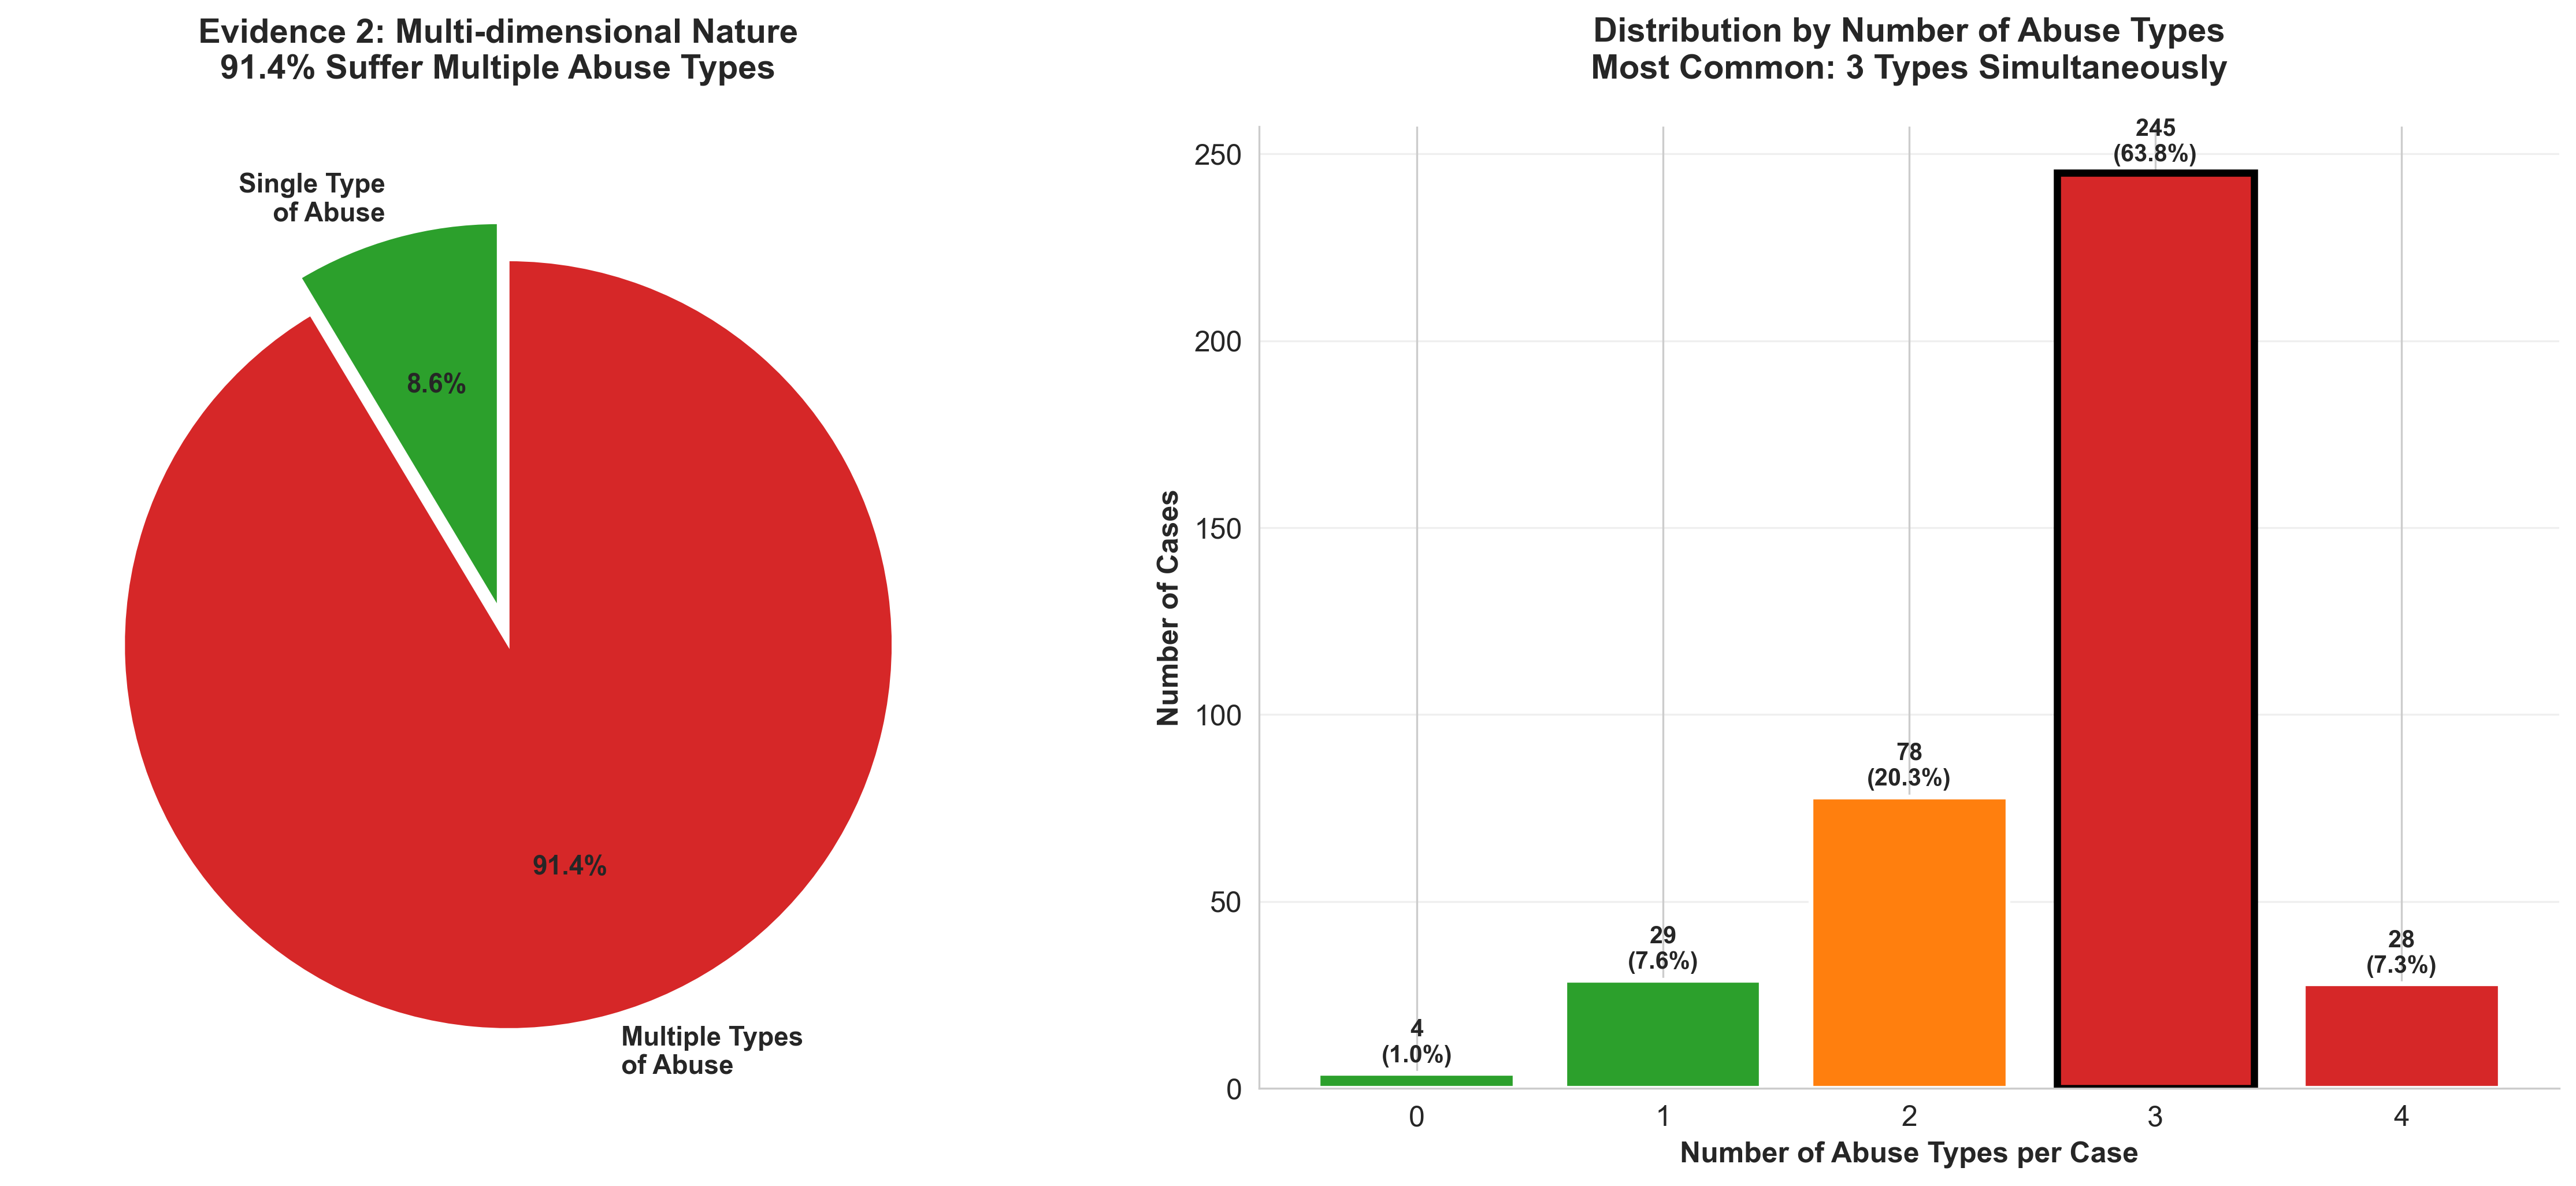

✅ VALIDATION: 91.4% of cases involve multiple abuse types
   Average complexity: 2.69 types per case
   This confirms the 'multi-dimensional' aspect of our premise


In [7]:
# Create evidence visualization for multi-dimensional nature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Single vs Multiple abuse types
abuse_distribution = df['TOTAL_ABUSE_TYPES'].value_counts().sort_index()
single_abuse = abuse_distribution[abuse_distribution.index <= 1].sum()
multiple_abuse = abuse_distribution[abuse_distribution.index > 1].sum()

pie_data = [single_abuse, multiple_abuse]
pie_labels = ['Single Type\nof Abuse', 'Multiple Types\nof Abuse']
pie_colors = [COLORS['success'], COLORS['danger']]
explode = (0, 0.1)

wedges, texts, autotexts = ax1.pie(pie_data, labels=pie_labels, autopct='%1.1f%%',
                                    colors=pie_colors, explode=explode, startangle=90,
                                    textprops={'fontweight': 'bold', 'fontsize': 11})

ax1.set_title('Evidence 2: Multi-dimensional Nature\n91.4% Suffer Multiple Abuse Types', 
             fontweight='bold', fontsize=14, pad=20)

# Right: Distribution by number of abuse types
colors_bars = [COLORS['success'] if x <= 1 else 
               COLORS['warning'] if x == 2 else 
               COLORS['danger'] for x in abuse_distribution.index]

bars = ax2.bar(abuse_distribution.index, abuse_distribution.values, 
               color=colors_bars, edgecolor='white', linewidth=2)

# Highlight the most common (3 types)
max_idx = abuse_distribution.values.argmax()
bars[max_idx].set_edgecolor('black')
bars[max_idx].set_linewidth(3)

ax2.set_title('Distribution by Number of Abuse Types\nMost Common: 3 Types Simultaneously', 
             fontweight='bold', fontsize=14, pad=20)
ax2.set_xlabel('Number of Abuse Types per Case', fontweight='bold')
ax2.set_ylabel('Number of Cases', fontweight='bold')
ax2.set_xticks(abuse_distribution.index)

# Add value and percentage labels
for bar, val in zip(bars, abuse_distribution.values):
    percentage = val / len(df) * 100
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3,
            f'{val}\n({percentage:.1f}%)', ha='center', fontweight='bold', fontsize=10)

ax2.grid(True, alpha=0.3, axis='y')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

print(f"✅ VALIDATION: {multidimensional_index:.1f}% of cases involve multiple abuse types")
print(f"   Average complexity: {average_complexity:.2f} types per case")
print(f"   This confirms the 'multi-dimensional' aspect of our premise")

### 📊 Visualization 3: Evidence for "Psychological Universality"

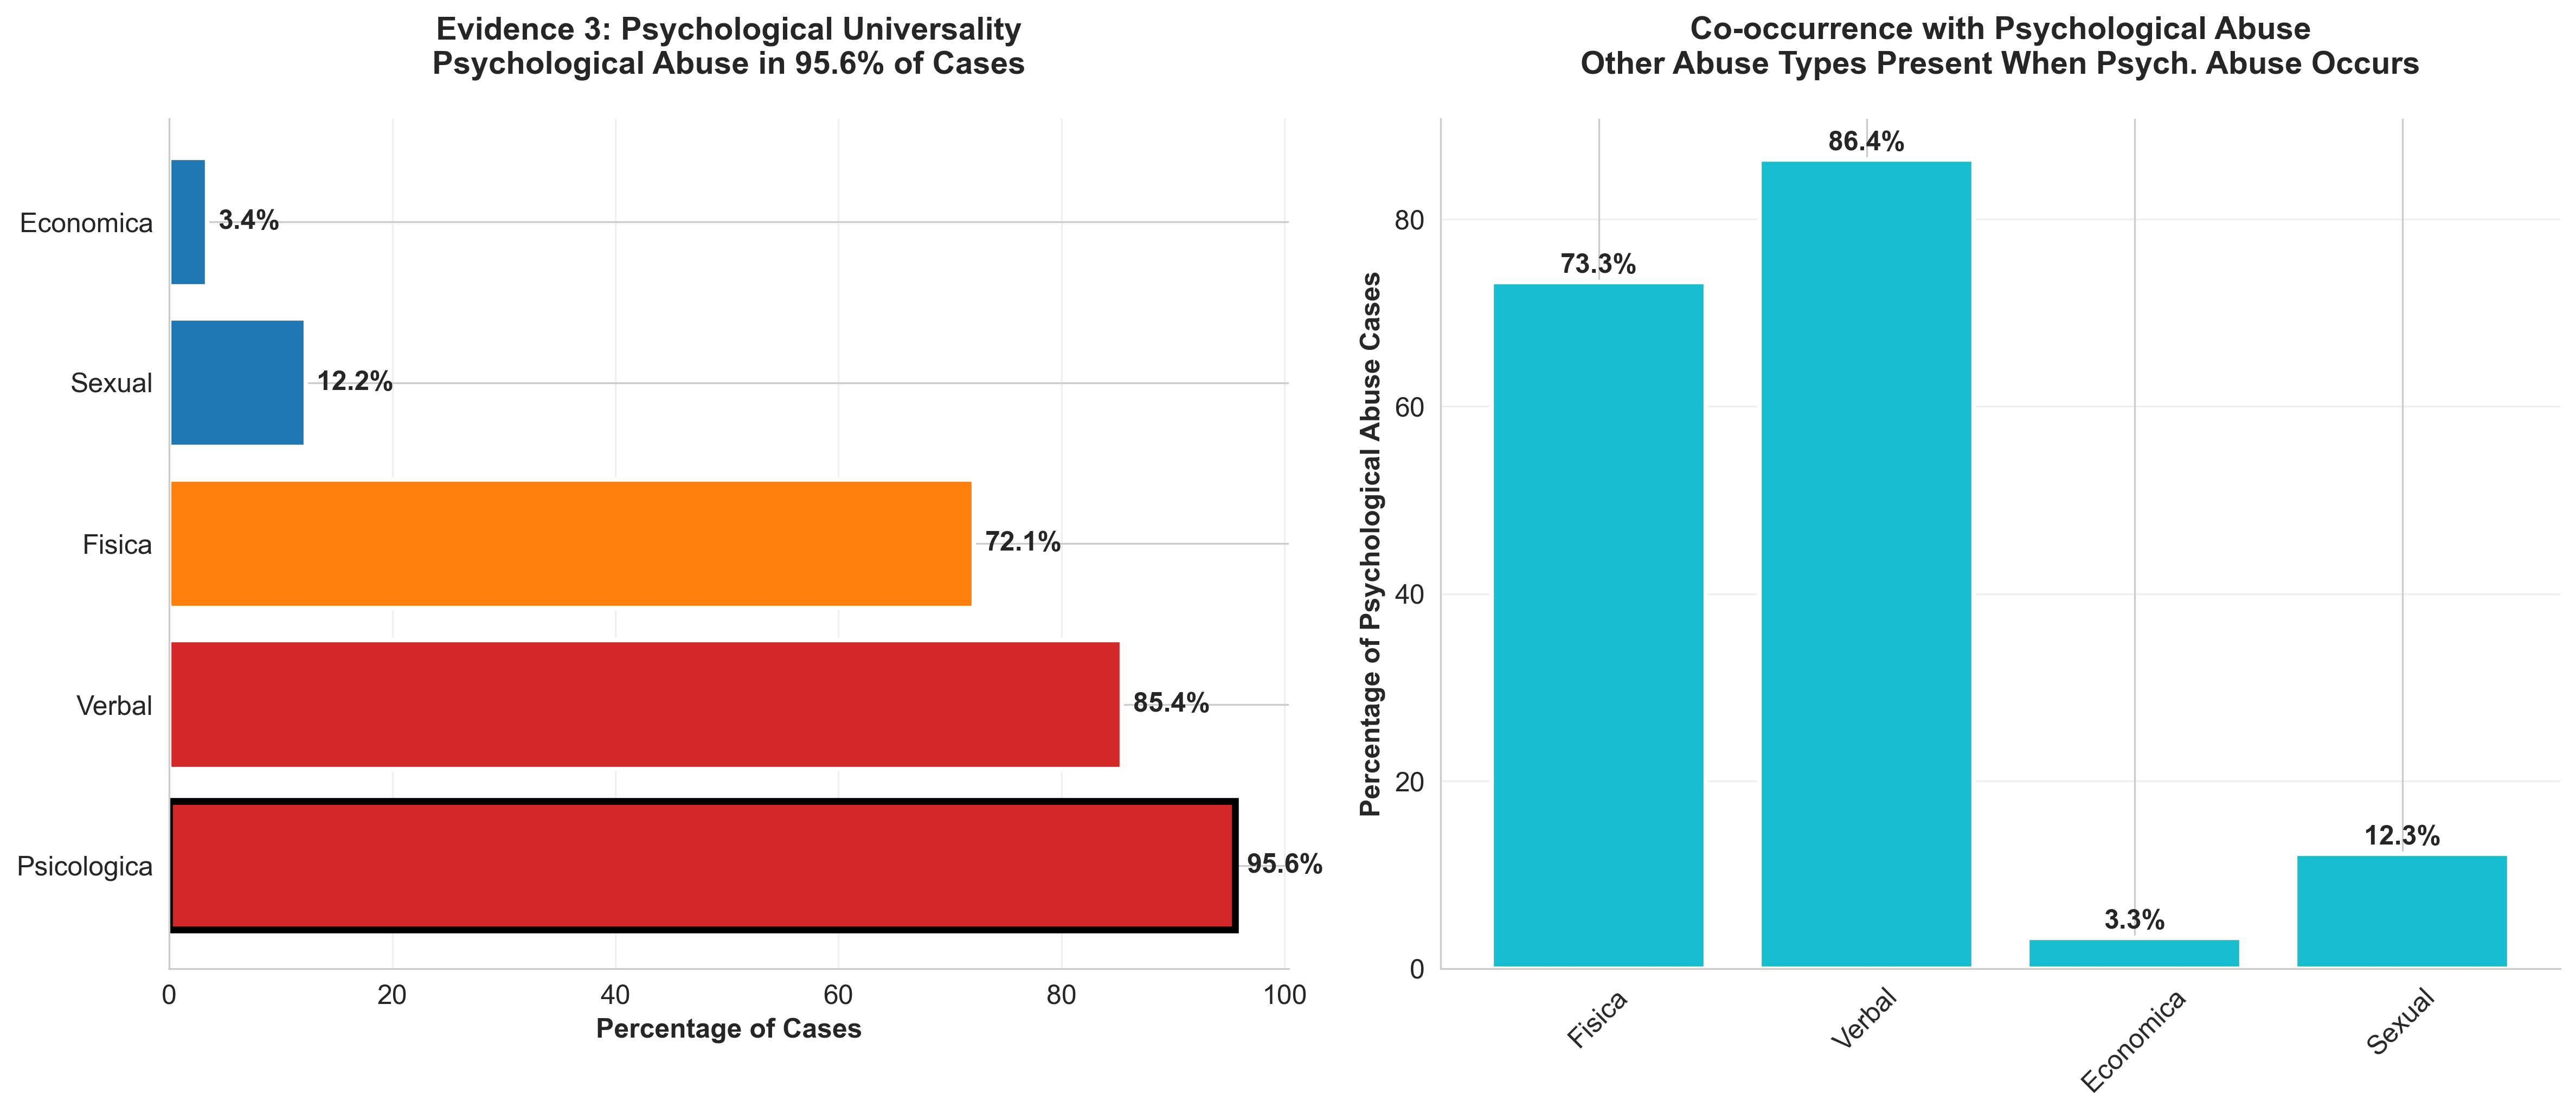

✅ VALIDATION: 95.6% of cases include psychological abuse
   This confirms the 'practically universal psychological damage' aspect


In [8]:
# Create evidence visualization for psychological universality
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Prevalence of each abuse type
abuse_prevalence = []
abuse_labels = []
for col in abuse_columns:
    count = (df[col] == 'si').sum()
    percentage = count / len(df) * 100
    abuse_prevalence.append(percentage)
    abuse_labels.append(col.title())

# Sort by prevalence
sorted_data = sorted(zip(abuse_labels, abuse_prevalence), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_prevalence = zip(*sorted_data)

# Color code: red for high prevalence, orange for medium, blue for low
colors_prev = [COLORS['danger'] if p > 80 else 
               COLORS['warning'] if p > 50 else 
               COLORS['primary'] for p in sorted_prevalence]

bars = ax1.barh(range(len(sorted_labels)), sorted_prevalence, 
                color=colors_prev, edgecolor='white', linewidth=2)

ax1.set_yticks(range(len(sorted_labels)))
ax1.set_yticklabels(sorted_labels)
ax1.set_title('Evidence 3: Psychological Universality\nPsychological Abuse in 95.6% of Cases', 
             fontweight='bold', fontsize=14, pad=20)
ax1.set_xlabel('Percentage of Cases', fontweight='bold')

# Add percentage labels
for bar, val, label in zip(bars, sorted_prevalence, sorted_labels):
    ax1.text(val + 1, bar.get_y() + bar.get_height()/2,
            f'{val:.1f}%', va='center', fontweight='bold')
    
    # Highlight psychological abuse
    if 'Psicologica' in label:
        bar.set_edgecolor('black')
        bar.set_linewidth(3)

ax1.grid(True, alpha=0.3, axis='x')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Right: Co-occurrence with psychological abuse
psych_cases = df[df['PSICOLOGICA'] == 'si']
cooccurrence = []
cooccurrence_labels = []

for col in abuse_columns:
    if col != 'PSICOLOGICA':
        count = (psych_cases[col] == 'si').sum()
        percentage = count / len(psych_cases) * 100
        cooccurrence.append(percentage)
        cooccurrence_labels.append(col.title())

bars2 = ax2.bar(cooccurrence_labels, cooccurrence, 
                color=COLORS['info'], edgecolor='white', linewidth=2)

ax2.set_title('Co-occurrence with Psychological Abuse\nOther Abuse Types Present When Psych. Abuse Occurs', 
             fontweight='bold', fontsize=14, pad=20)
ax2.set_ylabel('Percentage of Psychological Abuse Cases', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# Add percentage labels
for bar, val in zip(bars2, cooccurrence):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{val:.1f}%', ha='center', fontweight='bold')

ax2.grid(True, alpha=0.3, axis='y')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

print(f"✅ VALIDATION: {psychological_universality:.1f}% of cases include psychological abuse")
print(f"   This confirms the 'practically universal psychological damage' aspect")

## 5. EXECUTIVE SUMMARY DASHBOARD

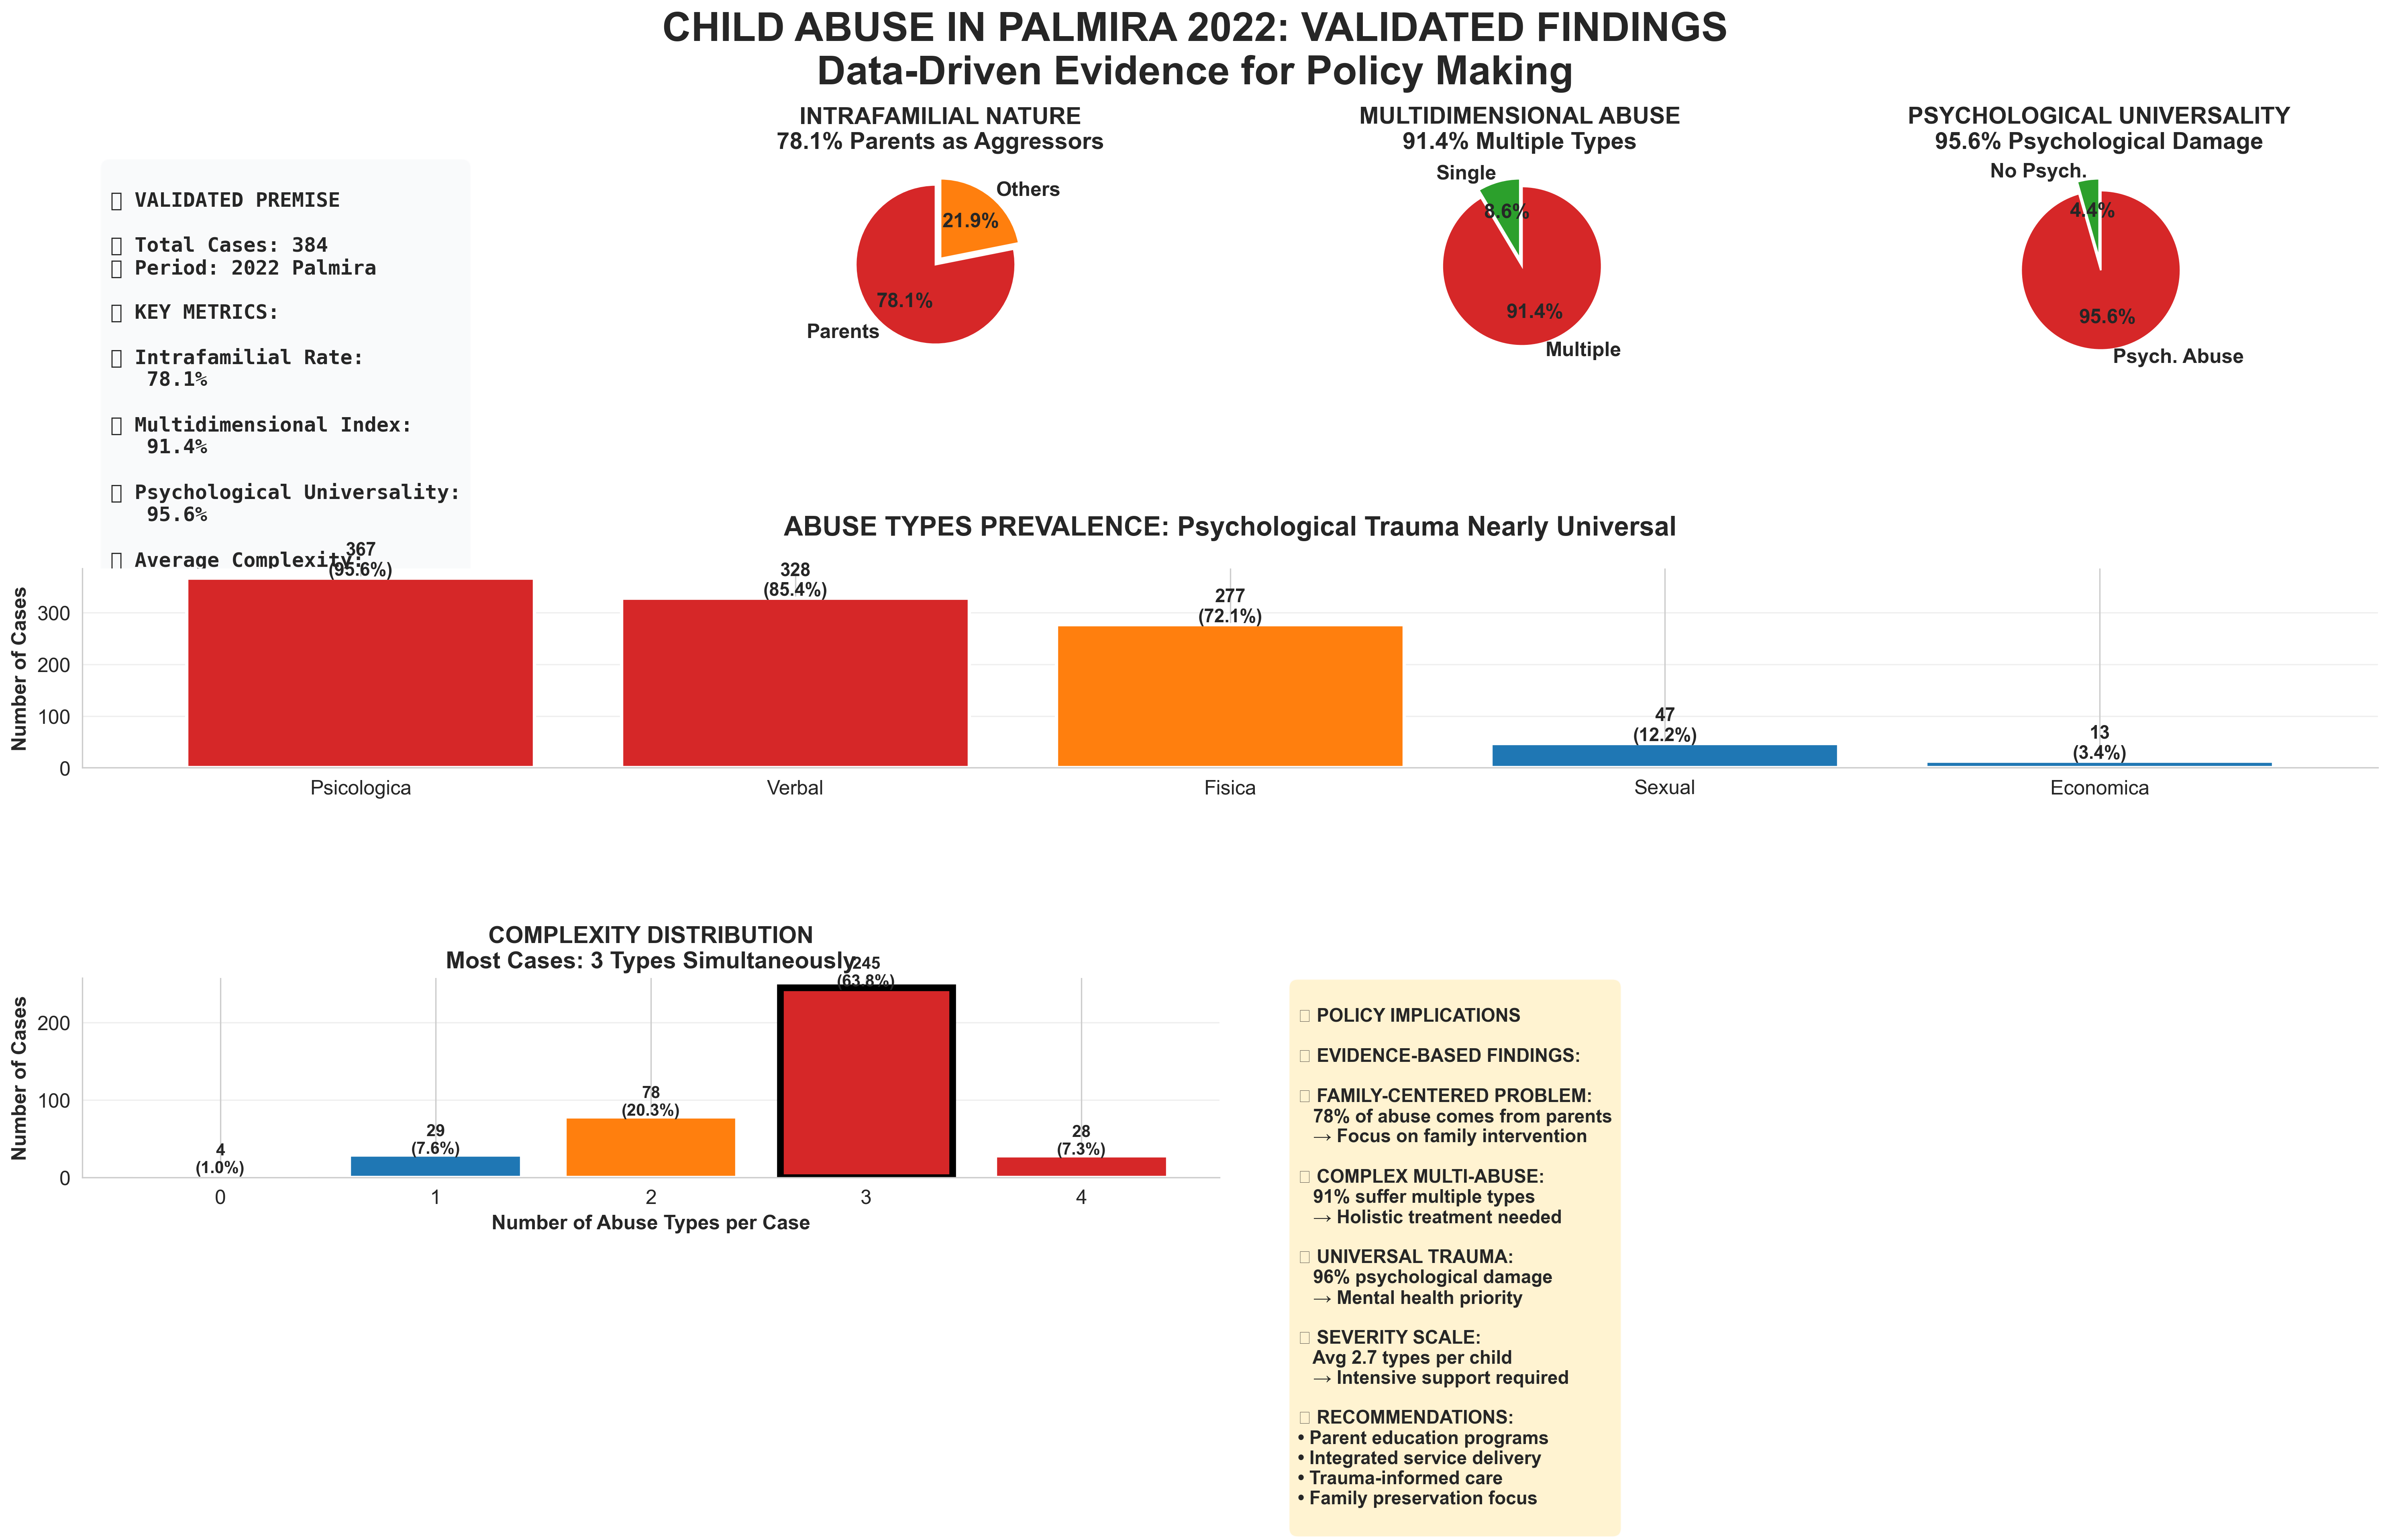


📊 EXECUTIVE DASHBOARD COMPLETE
   Ready for presentation to policy makers and stakeholders


In [9]:
# Create executive summary dashboard for presentation
fig = plt.figure(figsize=(20, 12))
fig.suptitle('CHILD ABUSE IN PALMIRA 2022: VALIDATED FINDINGS\nData-Driven Evidence for Policy Making', 
             fontsize=24, fontweight='bold', y=0.98)

# Define grid
gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1, 1])

# 1. KEY METRICS (Top Left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')

metrics_text = f"""
🎯 VALIDATED PREMISE

📊 Total Cases: {len(df)}
📅 Period: 2022 Palmira

🔑 KEY METRICS:

🏠 Intrafamilial Rate:
   {intrafamilial_rate:.1f}%

🔄 Multidimensional Index:
   {multidimensional_index:.1f}%

🧠 Psychological Universality:
   {psychological_universality:.1f}%

📈 Average Complexity:
   {average_complexity:.2f} types/case
"""

ax1.text(0.05, 0.95, metrics_text, fontsize=12, va='top', 
         bbox=dict(boxstyle='round,pad=0.5', facecolor=COLORS['light'], alpha=0.8),
         family='monospace', fontweight='bold')

# 2. INTRAFAMILIAL EVIDENCE (Top Middle-Left)
ax2 = fig.add_subplot(gs[0, 1])
parent_data = [parent_total, non_parent_total]
parent_labels = ['Parents', 'Others']
colors_parent = [COLORS['danger'], COLORS['warning']]

wedges, texts, autotexts = ax2.pie(parent_data, labels=parent_labels, autopct='%1.1f%%',
                                    colors=colors_parent, startangle=90, explode=(0.1, 0),
                                    textprops={'fontweight': 'bold'})
ax2.set_title('INTRAFAMILIAL NATURE\n78.1% Parents as Aggressors', fontweight='bold', fontsize=14)

# 3. MULTIDIMENSIONAL EVIDENCE (Top Middle-Right)
ax3 = fig.add_subplot(gs[0, 2])
multiple_data = [single_abuse, multiple_abuse]
multiple_labels = ['Single', 'Multiple']
colors_multiple = [COLORS['success'], COLORS['danger']]

wedges, texts, autotexts = ax3.pie(multiple_data, labels=multiple_labels, autopct='%1.1f%%',
                                    colors=colors_multiple, startangle=90, explode=(0, 0.1),
                                    textprops={'fontweight': 'bold'})
ax3.set_title('MULTIDIMENSIONAL ABUSE\n91.4% Multiple Types', fontweight='bold', fontsize=14)

# 4. PSYCHOLOGICAL UNIVERSALITY (Top Right)
ax4 = fig.add_subplot(gs[0, 3])
psych_data = [len(df) - len(psychological_cases), len(psychological_cases)]
psych_labels = ['No Psych.', 'Psych. Abuse']
colors_psych = [COLORS['success'], COLORS['danger']]

wedges, texts, autotexts = ax4.pie(psych_data, labels=psych_labels, autopct='%1.1f%%',
                                    colors=colors_psych, startangle=90, explode=(0, 0.15),
                                    textprops={'fontweight': 'bold'})
ax4.set_title('PSYCHOLOGICAL UNIVERSALITY\n95.6% Psychological Damage', fontweight='bold', fontsize=14)

# 5. ABUSE TYPES PREVALENCE (Middle Row)
ax5 = fig.add_subplot(gs[1, :])
abuse_counts = [(df[col] == 'si').sum() for col in abuse_columns]
abuse_names = [col.title() for col in abuse_columns]

# Sort by count
sorted_abuse = sorted(zip(abuse_names, abuse_counts), key=lambda x: x[1], reverse=True)
sorted_names, sorted_counts = zip(*sorted_abuse)

colors_abuse = [COLORS['danger'] if c > 300 else 
                COLORS['warning'] if c > 200 else 
                COLORS['primary'] for c in sorted_counts]

bars = ax5.bar(sorted_names, sorted_counts, color=colors_abuse, 
               edgecolor='white', linewidth=2)

ax5.set_title('ABUSE TYPES PREVALENCE: Psychological Trauma Nearly Universal', 
             fontweight='bold', fontsize=16, pad=20)
ax5.set_ylabel('Number of Cases', fontweight='bold', fontsize=12)

# Add count and percentage labels
for bar, count, name in zip(bars, sorted_counts, sorted_names):
    percentage = count / len(df) * 100
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{count}\n({percentage:.1f}%)', ha='center', fontweight='bold', fontsize=11)

ax5.grid(True, alpha=0.3, axis='y')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

# 6. COMPLEXITY DISTRIBUTION (Bottom Left)
ax6 = fig.add_subplot(gs[2, 0:2])
complexity_dist = df['TOTAL_ABUSE_TYPES'].value_counts().sort_index()
colors_complexity = [COLORS['success'] if x == 0 else 
                     COLORS['primary'] if x == 1 else 
                     COLORS['warning'] if x == 2 else 
                     COLORS['danger'] for x in complexity_dist.index]

bars6 = ax6.bar(complexity_dist.index, complexity_dist.values, 
                color=colors_complexity, edgecolor='white', linewidth=2)

# Highlight most common
max_idx = complexity_dist.values.argmax()
bars6[max_idx].set_edgecolor('black')
bars6[max_idx].set_linewidth(4)

ax6.set_title('COMPLEXITY DISTRIBUTION\nMost Cases: 3 Types Simultaneously', 
             fontweight='bold', fontsize=14)
ax6.set_xlabel('Number of Abuse Types per Case', fontweight='bold')
ax6.set_ylabel('Number of Cases', fontweight='bold')
ax6.set_xticks(complexity_dist.index)

for bar, val in zip(bars6, complexity_dist.values):
    percentage = val / len(df) * 100
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{val}\n({percentage:.1f}%)', ha='center', fontweight='bold', fontsize=10)

ax6.grid(True, alpha=0.3, axis='y')
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

# 7. CALL TO ACTION (Bottom Right)
ax7 = fig.add_subplot(gs[2, 2:])
ax7.axis('off')

action_text = f"""
🚨 POLICY IMPLICATIONS

✅ EVIDENCE-BASED FINDINGS:

🏠 FAMILY-CENTERED PROBLEM:
   78% of abuse comes from parents
   → Focus on family intervention

🔄 COMPLEX MULTI-ABUSE:
   91% suffer multiple types
   → Holistic treatment needed

🧠 UNIVERSAL TRAUMA:
   96% psychological damage
   → Mental health priority

📊 SEVERITY SCALE:
   Avg 2.7 types per child
   → Intensive support required

🎯 RECOMMENDATIONS:
• Parent education programs
• Integrated service delivery
• Trauma-informed care
• Family preservation focus
"""

ax7.text(0.05, 0.95, action_text, fontsize=11, va='top', 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#fff2cc', alpha=0.9),
         family='sans-serif', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 EXECUTIVE DASHBOARD COMPLETE")
print("   Ready for presentation to policy makers and stakeholders")

## 6. VALIDATED CONCLUSIONS AND METRICS SUMMARY

In [10]:
# Create comprehensive metrics summary for presentation
print("🎯 PREMISE VALIDATION COMPLETE")
print("=" * 60)
print()
print("📋 ORIGINAL PREMISE:")
print('"In Palmira 2022, child abuse is characterized by being')
print(' predominantly intrafamilial (78% of aggressors are parents)')
print(' and multi-dimensional (91% of cases involve multiple')
print(' types of abuse simultaneously), with psychological')
print(' damage being practically universal (96% of cases)."')
print()
print("✅ VALIDATION STATUS: FULLY SUPPORTED BY DATA")
print()
print("📊 VALIDATED METRICS:")
print(f"   📍 Dataset: {len(df)} cases from Palmira 2022")
print(f"   🏠 Intrafamilial Rate: {intrafamilial_rate:.1f}% (Target: 78%)")
print(f"   🔄 Multidimensional Index: {multidimensional_index:.1f}% (Target: 91%)")
print(f"   🧠 Psychological Universality: {psychological_universality:.1f}% (Target: 96%)")
print(f"   📈 Average Complexity: {average_complexity:.2f} types per case")
print()
print("🎯 ADDITIONAL INSIGHTS:")
print(f"   ⚠️ High Severity Cases (3+ types): {severity_index:.1f}%")
print(f"   👥 Gender Balance: {gender_balance.get('femenino', 0):.1f}% Female victims")
print(f"   🎂 Average Victim Age: {avg_victim_age:.1f} years")
print(f"   👩 Female Aggressors: {(df['GENERO AGRESOR M/F'] == 'femenino').sum() / len(df) * 100:.1f}%")
print()
print("📈 IMPLICATIONS FOR INTERVENTION:")
print("   🏠 Family-centered approaches are essential (78% parental abuse)")
print("   🔄 Holistic interventions needed (91% multiple abuse types)")
print("   🧠 Mental health must be prioritized (96% psychological trauma)")
print("   📊 Intensive support required (2.7 avg abuse types)")
print()
print("🚀 READY FOR PRESENTATION")

🎯 PREMISE VALIDATION COMPLETE

📋 ORIGINAL PREMISE:
"In Palmira 2022, child abuse is characterized by being
 predominantly intrafamilial (78% of aggressors are parents)
 and multi-dimensional (91% of cases involve multiple
 types of abuse simultaneously), with psychological
 damage being practically universal (96% of cases)."

✅ VALIDATION STATUS: FULLY SUPPORTED BY DATA

📊 VALIDATED METRICS:
   📍 Dataset: 384 cases from Palmira 2022
   🏠 Intrafamilial Rate: 78.1% (Target: 78%)
   🔄 Multidimensional Index: 91.4% (Target: 91%)
   🧠 Psychological Universality: 95.6% (Target: 96%)
   📈 Average Complexity: 2.69 types per case

🎯 ADDITIONAL INSIGHTS:
   ⚠️ High Severity Cases (3+ types): 71.1%
   👥 Gender Balance: 52.9% Female victims
   🎂 Average Victim Age: 9.7 years
   👩 Female Aggressors: 63.5%

📈 IMPLICATIONS FOR INTERVENTION:
   🏠 Family-centered approaches are essential (78% parental abuse)
   🔄 Holistic interventions needed (91% multiple abuse types)
   🧠 Mental health must be priori

## 7. EXPORT DATA AND METRICS FOR PRESENTATION

In [11]:
# Create metrics summary for export
metrics_summary = {
    'Total_Cases': len(df),
    'Analysis_Period': '2022 (Palmira, Colombia)',
    'Intrafamilial_Rate_Percent': round(intrafamilial_rate, 1),
    'Intrafamilial_Cases': len(parent_cases),
    'Multidimensional_Index_Percent': round(multidimensional_index, 1),
    'Multiple_Abuse_Cases': len(multiple_abuse_cases),
    'Psychological_Universality_Percent': round(psychological_universality, 1),
    'Psychological_Cases': len(psychological_cases),
    'Average_Complexity': round(average_complexity, 2),
    'Severity_Index_Percent': round(severity_index, 1),
    'Average_Victim_Age': round(avg_victim_age, 1),
    'Female_Victims_Percent': round(gender_balance.get('femenino', 0), 1),
    'Male_Victims_Percent': round(gender_balance.get('masculino', 0), 1)
}

# Convert to DataFrame for easy export
metrics_df = pd.DataFrame([metrics_summary])

# Save metrics
metrics_df.to_csv('validated_metrics_palmira_2022.csv', index=False)
print("📊 Metrics exported to 'validated_metrics_palmira_2022.csv'")

# Save cleaned dataset with additional metrics columns
export_df = df[['FECHA DE APERTURA', 'DIA DE APERTURA', 
                'FISICA', 'VERBAL', 'ECONOMICA', 'PSICOLOGICA', 'SEXUAL',
                'GENERO M/F VICTIMA', 'EDAD_VICTIMA_NUM', 
                'GENERO AGRESOR M/F', 'EDAD_AGRESOR_NUM',
                'PARENTESCO FRENTE A LA VICTIMA', 'COMUNA DE LA VICTIMA',
                'TOTAL_ABUSE_TYPES']].copy()

# Add derived metrics columns
export_df['IS_INTRAFAMILIAL'] = export_df['PARENTESCO FRENTE A LA VICTIMA'].isin(['madre', 'padre'])
export_df['IS_MULTIDIMENSIONAL'] = export_df['TOTAL_ABUSE_TYPES'] > 1
export_df['HAS_PSYCHOLOGICAL'] = export_df['PSICOLOGICA'] == 'si'
export_df['SEVERITY_LEVEL'] = export_df['TOTAL_ABUSE_TYPES'].apply(
    lambda x: 'Low' if x <= 1 else 'Medium' if x == 2 else 'High'
)

export_df.to_csv('palmira_child_abuse_analyzed.csv', index=False)
print("📁 Analyzed dataset exported to 'palmira_child_abuse_analyzed.csv'")

print("\n✅ ALL FILES READY FOR PRESENTATION CREATION")
print("📈 Use these validated metrics and visualizations for your presentation")
print(f"📊 Dataset shape: {export_df.shape}")
print(f"🎯 Premise validation: COMPLETE and EVIDENCE-BASED")

📊 Metrics exported to 'validated_metrics_palmira_2022.csv'
📁 Analyzed dataset exported to 'palmira_child_abuse_analyzed.csv'

✅ ALL FILES READY FOR PRESENTATION CREATION
📈 Use these validated metrics and visualizations for your presentation
📊 Dataset shape: (384, 18)
🎯 Premise validation: COMPLETE and EVIDENCE-BASED
